Name:Sheing Jing Ng (Stanley)
ID: 100206278
Date Started: 10/18/2016

Part 1: CLASSIFICATION EXPERIMENT

(5 points) Pick some data suitable for classification learning that we haven't already used for this class. In your write-up briefly summarize the data set including the predictive columns and the target column(s). Briefly describe any data preparation you performed (and say why you did it).

Dataset Name: Breast Cancer Wisconsin
Citation: This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.
Source Link: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin

I picked this datasets for classification experiment because it is a real life problem for medical diagnosis applied to breast cytology. In the past, a lot people are misdiagnosed or diagnosed at later stage due to insufficient tools to identify the patient's situation. By using machine learning, we can increase the classfication performance and predict a more accurate diagnosis based on available patient's information.

In this dataset, we have:

  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
  

Data Cleaning:
Missing attribute values: 16

There are 16 instances in Groups 1 to 6 that contain a single missing 
(i.e., unavailable) attribute value, are denoted by "?". 

I replaced the "?" value in the datasets to mean value of the column.

Target Columns:
I selected all the attributes from 1-10 as my target column for training.

Predictive Columns:
I selected the last attribute: Class as my predictive column. 
TO classify if the patient's symptoms is under benign or malignant.
    

In [1]:
import pandas
import sklearn
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import cross_validation as cv
from sklearn import metrics
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

##Part 1a) Data Cleaning:
g_data = pandas.read_csv('breast-cancer-wisconsin.csv')
print(g_data)
acc=0
for n in g_data["bare_nucleoli"]:
    if n!="?":
        acc+=float(n)
        mean = acc/len(g_data["bare_nucleoli"])
        
G_Data=g_data.replace("?",mean)
(g_train,g_test) = cv.train_test_split(G_Data, test_size=0.24)

predictors = ["clump_thickness","size_uniformity","shape_uniformity","marginal_adhesion","epithelial_size","bare_nucleoli","bland_chromatin","normal_nucleoli","mitoses"]


//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


          id  clump_thickness  size_uniformity  shape_uniformity  \
0    1000025                5                1                 1   
1    1002945                5                4                 4   
2    1015425                3                1                 1   
3    1016277                6                8                 8   
4    1017023                4                1                 1   
5    1017122                8               10                10   
6    1018099                1                1                 1   
7    1018561                2                1                 2   
8    1033078                2                1                 1   
9    1033078                4                2                 1   
10   1035283                1                1                 1   
11   1036172                2                1                 1   
12   1041801                5                3                 3   
13   1043999                1                1  

Question 1B: (6 points) Using either the scikit-learnSGDClassifier or Perceptron algorithm, perform an experiment to determine how well the classifier works on your data set. In your write-up, discuss the results. You will need to convince me that you have selected appropriate parameters for learning (e.g., learning rate, number of epochs). You will probably need to include a plot (or plots) of some sort to demonstrate this. Any data points you include should be averages over several runs (say 20?) with different training/testing splits to ensure that the results aren't simply due to luck.


[0.83750000000000002, 0.9007142857142858, 0.92428571428571438, 0.95499999999999985, 0.95714285714285707, 0.94964285714285701, 0.94499999999999995, 0.94535714285714278, 0.94785714285714273, 0.94785714285714262]


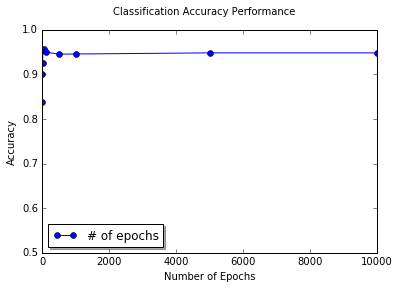

In [100]:
predictors = ["clump_thickness","size_uniformity","shape_uniformity","marginal_adhesion",\
              "epithelial_size","bare_nucleoli","bland_chromatin","normal_nucleoli","mitoses"]

y_values=[]
x_values=[1,5,10,25,50,100,500,1000,5000,10000] # numbers of learning rate
(g_train,g_test) = cv.train_test_split(G_Data, test_size=0.2)

for i in x_values:
    SGD = SGDClassifier(n_iter=i)
    total=0
    count=0
    average_accuracy=0
    
    for j in range(0,20):
        SGD.fit(g_train[predictors],g_train["class"])
        SGD_predictions=SGD.predict(g_test[predictors])
        total += metrics.accuracy_score(g_test["class"],SGD_predictions)
        count = count + 1
    
    average_accuracy = total / count
    y_values.append(average_accuracy)
print(y_values)
#print(np.amax(y_value)) 
#max function using numpy to find the highest rate in array.

%matplotlib inline
plt.suptitle('Classification Accuracy Performance')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.plot(x_values,y_values,'bo-',label='# of epochs')
plt.legend(loc='best',shadow=True)
plt.axis([0,10000,0.5,1])
plt.show()

In this question, I used Scikit-Learn SGDClassifier to perform my test analysis. 

Changing Variable: n_iter=i

In order to get the best accuracy performance by using SGDClassifier, I have selected different epochs values (x_values) for the machine to loop through 20 times and get the highest accuracy rate. 

Average accuracy rates are then appended into y_values. From the result above, we can see that the accuracy performance is pretty stagnant after n_iter>100. The best epochs value is 50.

10/30/2016:
P/S: I'd also tried to run with different splitting size, and overall the accuracy still maintain at >.9.



[0.97071428571428553, 0.96392857142857125, 0.97464285714285714, 0.96178571428571402, 0.96142857142857108, 0.96928571428571408]


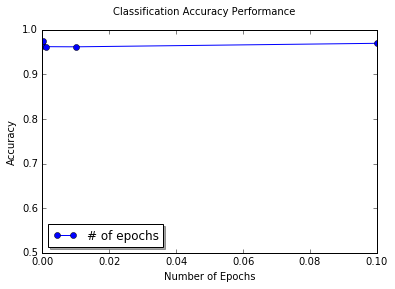

In [77]:
predictors = ["clump_thickness","size_uniformity","shape_uniformity","marginal_adhesion",\
              "epithelial_size","bare_nucleoli","bland_chromatin","normal_nucleoli","mitoses"]

y_value=[]
x_value=[.0000001,.00001,.0001,.001,.01,.1] # numbers of learning rate
(g_train,g_test) = cv.train_test_split(G_Data, test_size=0.2)

for i in x_value:
    SGD = SGDClassifier(eta0=i)
    total=0
    count=0
    average_accuracy=0
    
    for j in range(0,20):
        SGD.fit(g_train[predictors],g_train["class"])
        SGD_predictions=SGD.predict(g_test[predictors])
        #print(SGD_predictions)
        #print(g_test['class'])
        total += metrics.accuracy_score(g_test["class"],SGD_predictions)
        count = count + 1
    
    average_accuracy = total / count
    y_value.append(average_accuracy)
print(y_value)
#print(np.amax(y_value)) 
#max function using numpy to find the highest rate in array.

%matplotlib inline
plt.suptitle('Classification Accuracy Performance of eta0')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.plot(x_value,y_value,'bo-',label='# of eta0')
plt.legend(loc='best',shadow=True)
plt.axis([0.0000001,.1,0.5,1])
plt.show()

Question 1C:(6 points) Using a scikit-learn implementation of another classifier algorithm (e.g., k-Nearest-Neighbor, Random Forest, or Multilayer Perceptron), perform an experiment to determine how well the classifier works on your data set. In your write-up, discuss the results. You will need to convince me that you have selected appropriate parameters for learning (e.g., the number of neighbors, number of trees, etc.). You will probably need to include a plot (or plots) of some sort to demonstrate this. Any data points you include should be averages over several runs with different training/testing splits to ensure that the results aren't simply due to luck.

10/27/2016
Extras that I did in this question:

I used rfc.feature_importances attribute to sort out the importances of target column, and create a new predictor column that only consider those columns which had high importance rate.

From the graph you can clearly see the importances of each target column by using RFC method.

P/S: I used criterion ='entropy' in all my RFC method below. (I did test it myself with other criterions and 'entropy' is the best option.


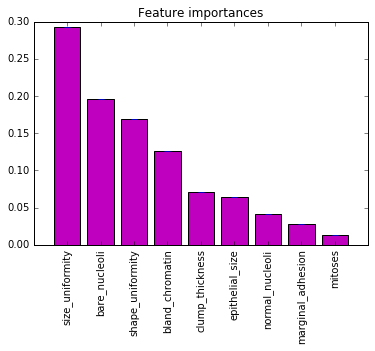

In [78]:
from sklearn.ensemble import RandomForestClassifier as RFC
%matplotlib inline
import matplotlib.pyplot as plt

rfc = RFC(n_estimators=100,random_state=0,criterion='entropy')
X=g_train[predictors]
y=g_train["class"]
rfc.fit(X, y)
importances = rfc.feature_importances_

#Sort the features ranking and append the result into predictors array
#Compute the standard deviation along the specified axis.
std = np.std([rfc.feature_importances_ for tree in rfc.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
lable_features_sorted=[]
for i in indices:
     lable_features_sorted.append(predictors[i])
        

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="m", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]),lable_features_sorted ,rotation=90)
plt.show()

#print(importances)

In [90]:
new_predictors= ["size_uniformity","shape_uniformity","bland_chromatin","bare_nucleoli"]
predictors = ["clump_thickness","size_uniformity","shape_uniformity","marginal_adhesion",\
              "epithelial_size","bare_nucleoli","bland_chromatin","normal_nucleoli","mitoses"]

#To show the difference of new_preditors vs predictors
rfc = RFC(criterion='entropy')
rfc.fit(g_train[new_predictors],g_train["class"])
g_predictions1 = rfc.predict(g_test[new_predictors])
print(metrics.accuracy_score(g_test["class"],g_predictions1))

rfc = RFC(criterion='entropy')
rfc.fit(g_train[predictors],g_train["class"])
g_predictions2= rfc.predict(g_test[predictors])
print(metrics.accuracy_score(g_test["class"],g_predictions2))


0.985714285714
0.978571428571


[0.94357142857142828, 0.95499999999999985, 0.9553571428571429, 0.96678571428571414, 0.96392857142857125, 0.96714285714285708, 0.97107142857142836, 0.9735714285714282]


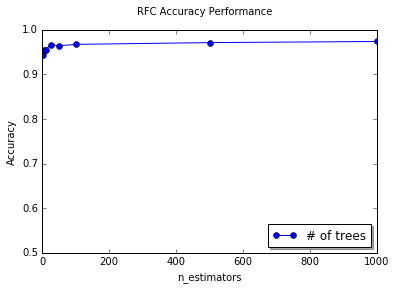

In [96]:
x_array=[1,5,10,25,50,100,500,1000]
y_array=[]
(g_train,g_test) = cv.train_test_split(G_Data, test_size=0.2)

for i in x_array:
    rfc = RFC(n_estimators=i,criterion='entropy')
    total=0
    count=0
    average_accuracy=0
    
    for j in range(0,20):
        rfc.fit(g_train[predictors],g_train["class"])
        rfc_predictions=rfc.predict(g_test[predictors])
        #print(_predictions)
        #print(g_test['class'])
        total += metrics.accuracy_score(g_test["class"],rfc_predictions)
        count = count + 1
    
    average_accuracy = total / count
    y_array.append(average_accuracy)
print(y_array)
#print(np.amax(y_array))

%matplotlib inline
plt.suptitle('RFC Accuracy Performance')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.plot(x_array,y_array,'bo-',label='# of trees')
plt.legend(loc='lower right',shadow=True)
plt.axis([0,1000,0.5,1])
plt.show()

From the result above, we can clearly tell, by increasing the number of trees, the results shown an incremental improvement. I am not going to run a higher n_estimators than 1000 due to slow running time. 

P/S: This was tried on different splitting test size, and results are similar and shown an incremental improvement as n_estimators increase.

Question 1D:(3 points) Discuss conclusions in your write-up. Which algorithm performed better? Give reasons why you think that's the case.

SGDClassfier vs RandomForestClassfier

According to the result above, both classfier perform well and had accuracy >90%. However,
based on the graph below, we can clearly tell RFC performs better than SGDClassifier.

The reason I think RFC is a better algorithm is because I applied "entropy" criterion and sorted the target columns with their importances. This allow me to remove the noise in the data and get a higher accuracy rate. 


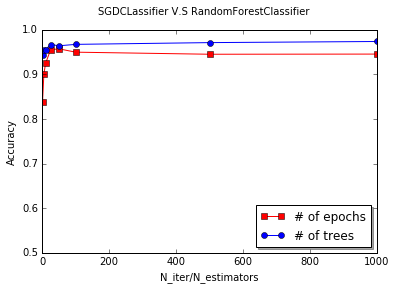

In [102]:
%matplotlib inline
plt.suptitle('SGDCLassifier V.S RandomForestClassifier')
plt.xlabel('N_iter/N_estimators')
plt.ylabel('Accuracy')
plt.plot(x_values,y_values,'rs-',label='# of epochs')
plt.plot(x_array,y_array,'bo-',label='# of trees')
plt.legend(loc='lower right',shadow=True)
plt.axis([0,1000,0.5,1])
plt.show()